# Trabalho Final GCC-108 - Teoria da Computação


Alunos: Arlan da Silva Trindade Matricula: 201920353
        Arthur Eduardo Silva    Matricula: 201920336
        
Link do Git: https://github.com/ArlanTR/Trabalho-Final-GCC-108---Teoria-da-Computa-o
        

Questão 1
Explicação: A nossa ideia foi converter os valores de binários para unários antes de dar entrada com os dados na máquina, e depois usar uma máquina de turing que faz a função númerica de soma para somar os dois números e depois converter de volta para binário.<br>
exemplo de entrada: 1111011111

Questão 2
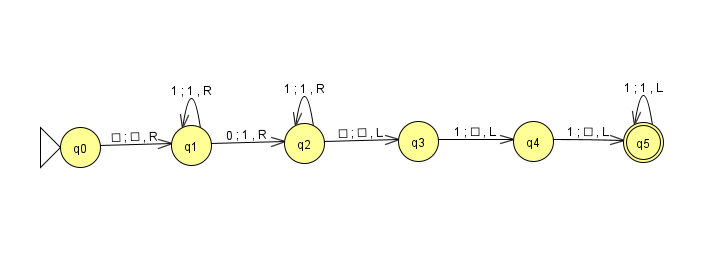

Questão 3<br>
Q = conjunto de estados (padrão q[0-5]+)<br>

Σ = {0,1}<br>

Γ = {B,0,1}<br>

δ = função de transição no formato (q_i,x)→(q_j,y,D); assim, estando no estado q_i, lendo x, vai para o estado q_j, escreve y e movimenta na direção de D. D será L para esquerda ou R para direita.<br>
δ(q0,B)→(q1,B,R);<br>
δ(q1,0)→(q2,1,R);<br>
δ(q1,1)→(q1,1,R);<br>
δ(q2,B)→(q3,B,L);<br>
δ(q2,1)→(q2,1,R);<br>
δ(q3,1)→(q4,B,L);<br>
δ(q4,1)→(q5,B,L);<br>
δ(q5,1)→(q5,1,L);<br>

q_0 = estado inicial

Questão 4
Transição             Encoding            <br>
δ(q0,B)→(q1,B,R);  101110110111011        <br>
δ(q1,0)→(q2,1,R);  11010111011011         <br>
δ(q1,1)→(q1,1,R);  11011011011011         <br>
δ(q2,B)→(q3,B,L);  111011101111011101     <br>
δ(q2,1)→(q2,1,R);  1110110111011011       <br>
δ(q3,1)→(q4,B,L);  1111011011111011101    <br>
δ(q4,1)→(q5,B,L);  111110110111111011101  <br>
δ(q5,1)→(q5,1,L);  111111011011111101101  <br>

M em R(M) = 00010111011011101100110101110110110011011011011011001110111011110111010011101101110110110011110110111110111010011111011011111101110100111111011011111101101000

Questão 5

In [17]:
import pandas as pd
entrada = pd.read_csv('exemplo1.csv')
for row in entrada:
    dado = row
dado = list(dado.split(';'))
maquina = "00010111011011101100110101110110110011011011011011001110111011110111010011101101110110110011110110111110111010011111011011111101110100111111011011111101101000"
def conversordeDecParaUN(decimal):
    resultado = "1"
    for i in range (decimal):
        resultado = resultado +"1"
    return resultado
def conversordeUNParaDec(unario):
    resultado = -1
    for i in range (len(unario)):
        resultado = resultado + 1
    return resultado
entradaUnaria = ""+ conversordeDecParaUN(int(dado[0],2))
entradaUnaria = entradaUnaria+ "0" +conversordeDecParaUN(int(dado[1],2)) 
maquinaMaisEntrada = maquina + entradaUnaria
separador = maquinaMaisEntrada.split("000")
#fita 1 configurações
fita1 = separador[1].split("00")
 #fita 2 entrada
fita2 = list(separador[2]+"B")
#fita 3 saida

def MTU():
    fita3 = list("")
    i=0
    estado = 0
    proximoestado = 0
    while i != -1:
        instrucao = list()
        # dividir a instrução
        k = 0
        while k < len(fita1):
            instrucao = list(fita1[k].split("0"))
            if int(tradutorEstado(instrucao[0])) == estado:
                k = (len(fita1))
            k = k +1
        if instrucao[0] != "1":
            for j in range (len(fita1)):
                instrucaoDaFita = fita1[j].split("0")
                if tradutorEstado(instrucaoDaFita[0]) == estado:
                    if fita2[i] == tradutorValor(instrucaoDaFita[1]):
                        estado = tradutorEstado(instrucaoDaFita[2])
                        if instrucaoDaFita[3] == "11":
                            fita2[i] = "1"
                            if instrucaoDaFita[4] == "11":
                                fita3.append("1")
                                i = i +1
                            else:
                                i = i- 1
                        if instrucaoDaFita[3] == "1":
                            fita3 = fita3 + "0"
                            if instrucaoDaFita[4] == "11":
                                fita3.append("0")
                                i = i +1
                            else:
                                i = i- 1
                        if instrucaoDaFita[3] == "111":
                            if instrucaoDaFita[4] == "11":
                                fita3.append("B")
                                i = i +1
                            else:
                                if tradutorValor(instrucaoDaFita[1]) != "B":
                                    fita3.pop()
                                i = i- 1
        else:
            estado = tradutorEstado(instrucao[2])
    resultadoUnario = "".join(fita3)
    resultadoDecimal = conversordeUNParaDec(resultadoUnario)
    print (bin(resultadoDecimal).replace("0b", ""))

def tradutorValor(texto):
    if texto == "1":
        return "0"
    if texto == "11":
        return "1"
    if texto == "111":
        return "B"
def tradutorEstado(texto):
        if texto == "1":
            return 0
        if texto == "11":
            return 1
        if texto == "111":
            return 2
        if texto == "1111":
            return 3
        if texto == "11111":
            return 4
        if texto == "111111":
            return 5


MTU()

1100


Questão 6

A) A Tese de Chuch-Turing valida que a solução de um problema é uma característica inerente do própio problema e não do sistema algorítmico que é usado para a solução, a tese também define que um algoritmo só é capaz de resolver um problema computável se uma Máquina de Turing puder resolver esse problema também.

Para os problemas de Decisão: Haverá um algoritmo capaz de resolver um problema de decisão se, e somente se, houver uma Máquina de Turing que pare para todas as sequências de entrada e seja capaz de resolver o problema. Existem também problemas de Decisão com solução parcial, para esses problemas é retornado aceito para os válidos e rejeitado ou simplesmente sem resposta para os inválidos.

Para os problemas de Reconhecimento: Dado um problema de decisão P, P será parcialmente solucionável se, e somente se, houver uma Máquina de Turing que consiga aceitar de forma precisa as intâncias de P em que a resposta é aceita. Isso fortalece a tese de Church-Turing em relação as funções computáveis.

Para os problemas computáveis: Uma função f é efetivamente computável se, e somente se, houver uma Máquina de Turing capaz de calcular f.



B) É impossível responder, pois é um problema indecidível(problema da parada).

Para provar isso, usaremos a prova por contradição.

Suponha uma máquina H que aceite quando a máquina M aceita e rejeite quando a Máquina M rejeita. H recebe como entrada a máquina M, ou seja, a entrada de H será R(M).

A máquina H com entrada R(M): Se M parar H aceita, Se M não parar H rejeita.

Agora mudaremos H para H', H' linha continuará a computação quando H parar, ou seja, H' irá para a direita indefinidamente.

A máquina H' com entrada R(M): Se M parar H' aceita, Se M não parar H' entra em loop.

Nesse ponto da prova, H' será combinada com uma máquina COPY que faz cópia da entrada R(M) para ser parte da máquina D. A entrada de D será a representação de máquina de Turing R(M). Para  cálculo de D primeiro é feita a cópia da entrada R(M), gerando assim a cadeia R(M)R(M). A computação prossegue executando H' em R(M)R(M).

A máquina D com entrada R(M): Se M parar D entra em loop, Se M não parar D para.

Como a entrada de D pode ser a representação de qualquer máquina de Turing com alfabeto (0, 1, B) . Podemos usar o próprio D como entrada.

A máquina D com entrada R(D): Se D parar então D entra em loop, Se D não parar então D para.

Isso é um absurdo!
